<a href="https://colab.research.google.com/github/AnnaSmith3110/Data-Analysis/blob/main/SwiggyOrderAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA:Analyzing my Swiggy ordering patterns**

**Steps to visualize your own Swiggy data:**
1. Log into: https://www.swiggy.com/
2. Open developer tools>console and type the following

```
// Fetch request:
var xmlHttp = new XMLHttpRequest();
xmlHttp.open("GET", "https://www.swiggy.com/dapi/order/all?order_id=", false);
xmlHttp.send(null);

// Create a Blob object from the response text
var blob = new Blob([xmlHttp.responseText], { type: "application/json" });

// Create a download link
var downloadLink = document.createElement("a");
downloadLink.href = URL.createObjectURL(blob);
downloadLink.download = "response.json";
downloadLink.click();


```
3. Rename file to orders.json
4. Upload to Colab and enjoy your visualization!




**Import libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import seaborn as sns
import folium #maps
from geopy.geocoders import Nominatim #maps
from datetime import datetime
import calendar
import webbrowser

**Load JSON data**

In [ ]:
data = json.load(open('orders.json', 'r'))

## **Basic Info about my order pattern**

**How many orders have I made totally?**

In [ ]:
totalOrders = 0
for my_dict in data:
    order_items = my_dict.get("order_items", [])  # Get the order_items array from the dictionary
    for item in order_items:
        item_name = item.get("name")
        totalOrders+=1
totalOrders

142

**Where do I order from the most?**

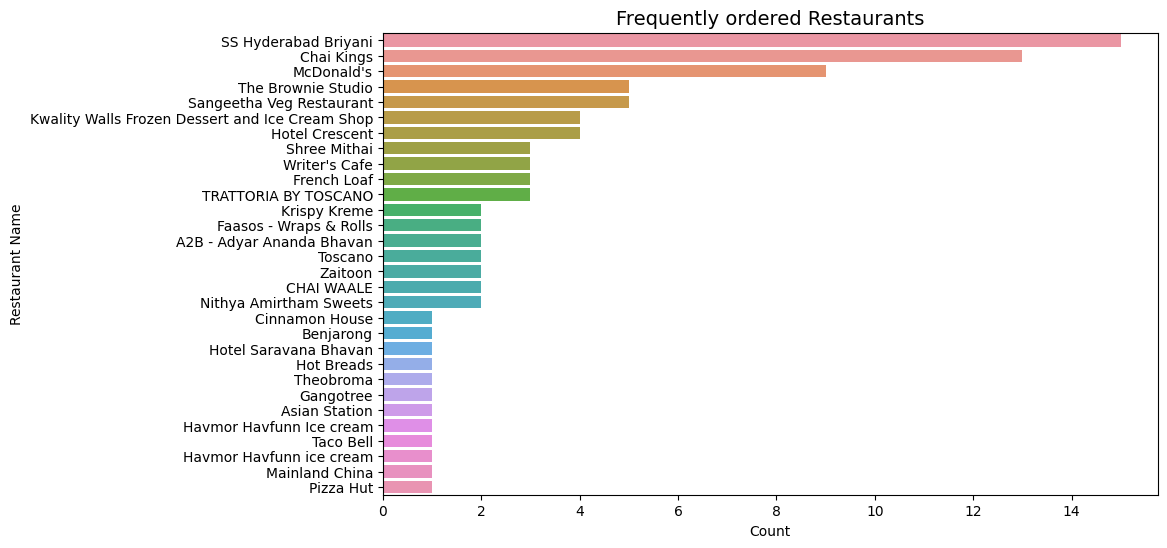

In [ ]:
def extract_restaurant_names(json_data):
    restaurant_names = []
    for i in range(len(json_data)):
      restaurant_names.append(data[i]["restaurant_name"])

    return restaurant_names

# Extract restaurant names from the JSON
restaurant_names = extract_restaurant_names(data)

# Count the occurrences of each restaurant name
restaurant_counts = {}
for name in restaurant_names:
    if name in restaurant_counts:
        restaurant_counts[name] += 1
    else:
        restaurant_counts[name] = 1

# Plot the count of restaurant names
plt.figure(figsize=(10, 6))
plt.title("Frequently ordered Restaurants", fontsize=14)
# Sort the restaurant_counts dictionary by values in descending order
sorted_counts = sorted(restaurant_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted restaurant names and counts into separate lists
sorted_names = [item[0] for item in sorted_counts]
sorted_counts = [item[1] for item in sorted_counts]

sns.barplot(x=sorted_counts, y=sorted_names)
plt.xlabel("Count")
plt.ylabel("Restaurant Name")
plt.show()

**What dish do i order the most?**

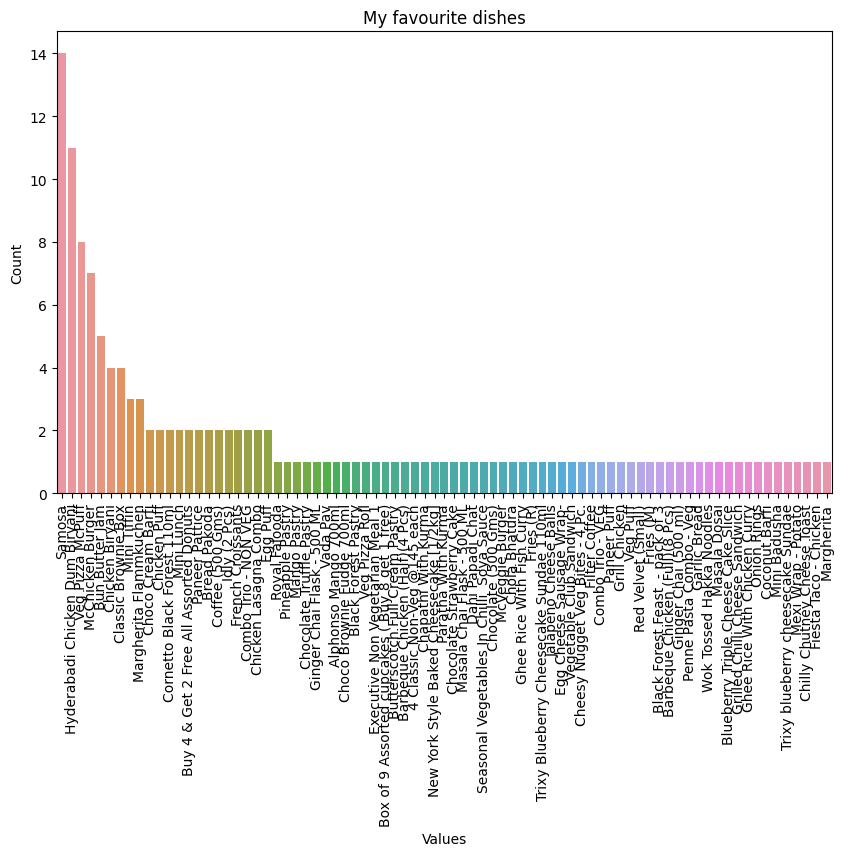

In [ ]:
items = []

# traverse through all entries ie:total orders
for i in range(len(data)):
  #for each order instance, extract the order name
  for j in range (len(data[i]['order_items'])):
     items.append((data[i]['order_items'][j]['name']))

# Create a pandas Series from the list
series = pd.Series(items)
# Count the occurrences of each value in the Series
value_counts = series.value_counts()
# Sort the value_counts Series by values in descending order
sorted_counts = value_counts.sort_values(ascending=False)

# Plot the count of each value
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_counts.index, y=sorted_counts.values)
plt.title("My favourite dishes")
plt.xlabel("Values")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Restaurant and type of food ordered**
ie: veg/non-veg

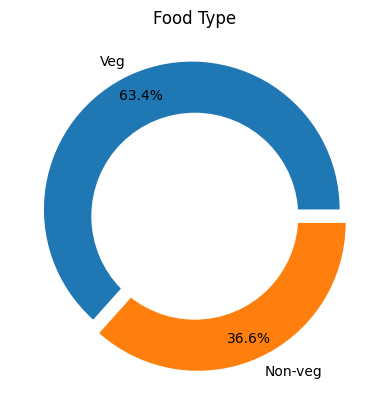

In [ ]:
foodType = []
nonvegCount = 0
vegCount = 0
for my_dict in data:
    order_items = my_dict.get("order_items", [])  # Get the order_items array from the dictionary
    for item in order_items:
        item_type = item.get("is_veg")
        if item_type == "1":
          vegCount+=1
        else:
          nonvegCount+=1

lables = ["Veg", "Non-veg"]
foodType.append(vegCount)
foodType.append(nonvegCount)
plt.title("Food Type")
# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(foodType, labels=lables,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()

**Whats my favourtie cuisine?**


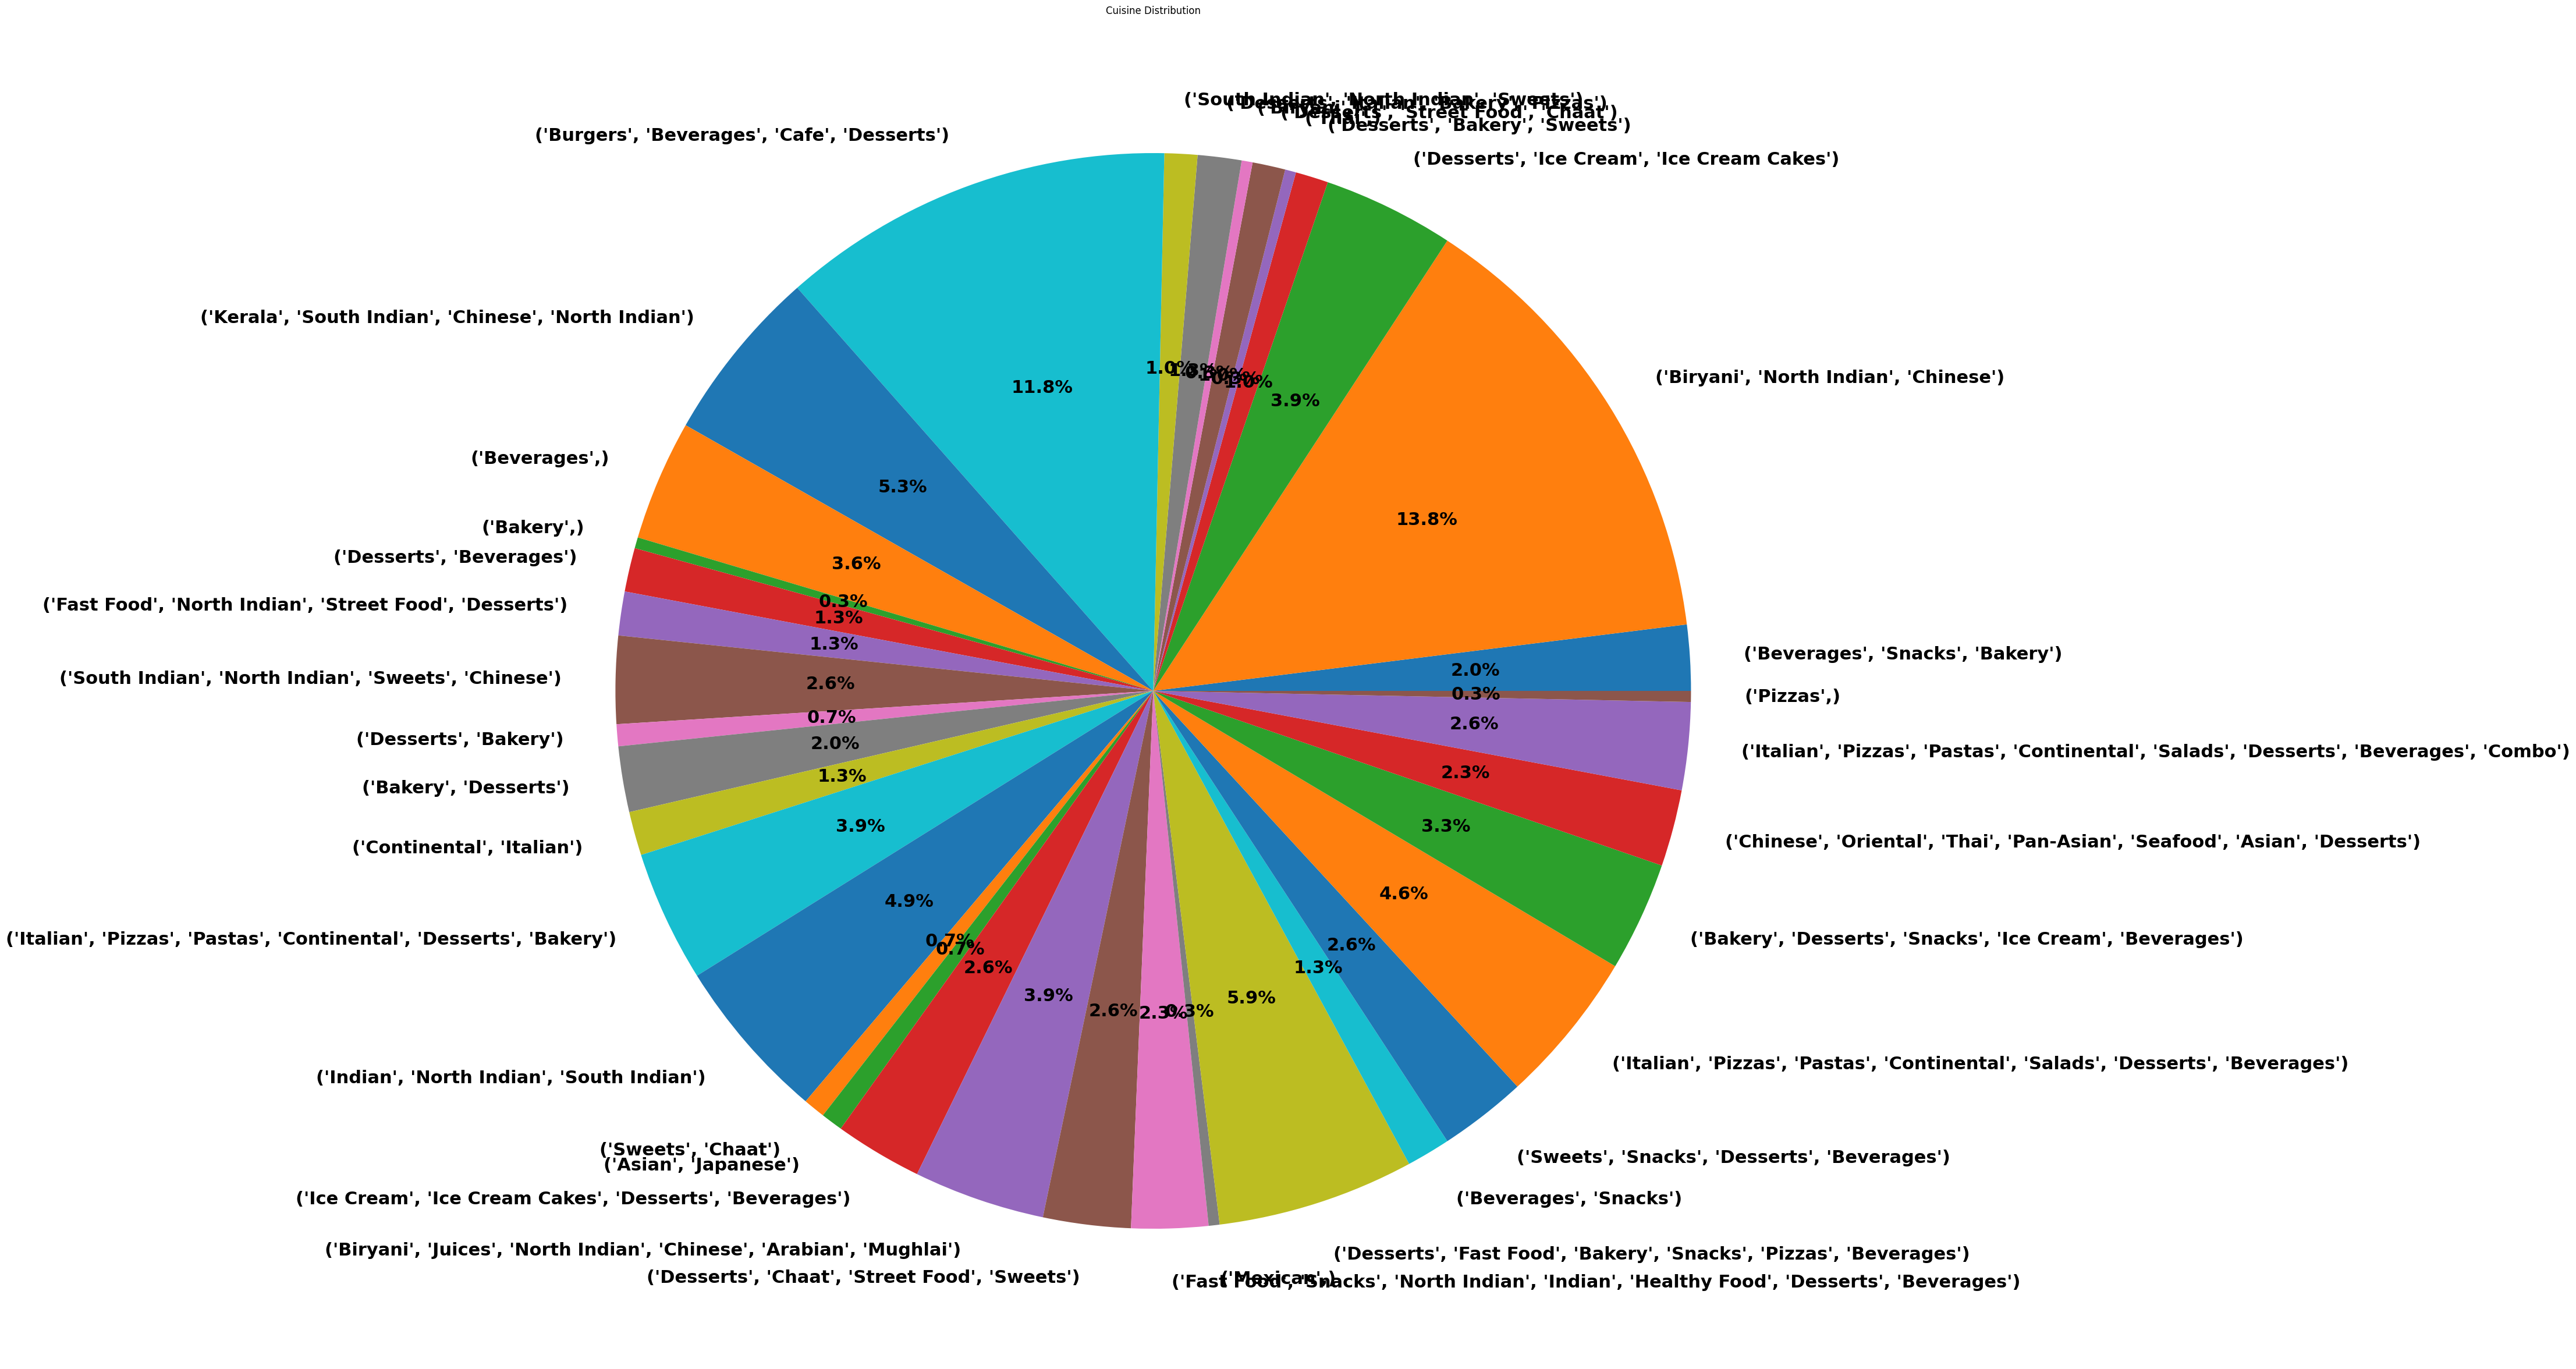

In [ ]:
# Extract cuisine names from the JSON
def extract_cuisine_names(json_data):
    cuisine_names = []
    for i in range(len(json_data)):
     for j in range(len(data[i]["restaurant_cuisine"])):
       cuisine_names.append(data[i]["restaurant_cuisine"])

    return cuisine_names

cuisine_names = extract_cuisine_names(data)

#compute occurence of each cuisine name
cuisine_count = {}
for cuisine in cuisine_names:
  #for easier comparsion, convert to tuple
  cuisine_tuple = tuple(cuisine)
  if cuisine_tuple in cuisine_count:
    cuisine_count[cuisine_tuple] +=1
  else:
    cuisine_count[cuisine_tuple] = 1

# grouped_categories = []

# for cuisines in cuisine_names:
#     if cuisines not in grouped_categories:
#         grouped_categories.append(cuisines)

# print(grouped_categories)

# Extract the cuisines and their corresponding counts
cuisines = list(cuisine_count.keys())
counts = list(cuisine_count.values())

# Plot the pie chart
plt.figure(figsize=(30, 30))
plt.pie(counts, labels=cuisines, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 600})
plt.title("Cuisine Distribution")
plt.show()

## **Timeline of orders**

**When do i order the most?**

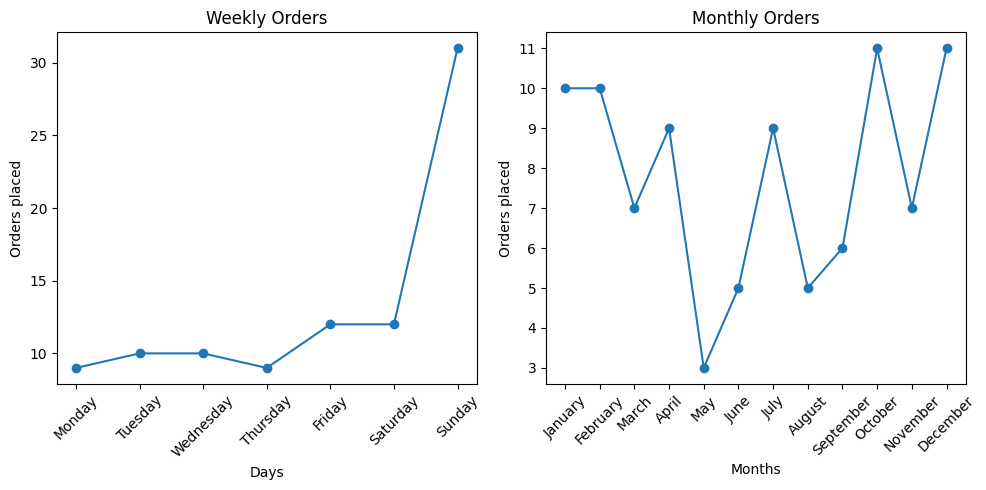

In [ ]:
# #extract date
# t = data[0]["order_day"]
# #convert string to object
# datetime_object = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
# datetime_object.strftime("%d")
# #convert int to corresponding day
# weekday = datetime_object.weekday()
# day_of_week = calendar.day_name[weekday]
# # print(day_of_week)

#extract all order dates and store in list
order_day = []
order_month = []
for i in range(len(data)):
  datetime_obj = datetime.strptime(data[i]["order_time"], '%Y-%m-%d %H:%M:%S')
  #append days of week
  datetime_obj.strftime("%d")
  weekday = datetime_obj.weekday()
  day_of_week = calendar.day_name[weekday]
  order_day.append(day_of_week)
  #append months
  datetime_obj.strftime("%m")
  month = datetime_obj.month
  month_of_year = calendar.month_name[month]
  order_month.append(month_of_year)

order_day_count = {}
order_month_count = {}

for day in order_day:
  if day in order_day_count:
     order_day_count[day] += 1
  else:
     order_day_count[day] = 1

# Define the desired order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Extract the days and order day_counts as separate lists in the desired order
days = [day for day in day_order if day in order_day_count]
day_counts = [order_day_count[day] for day in day_order if day in order_day_count]

for month in order_month:
  if month in order_month_count:
    order_month_count[month] += 1
  else:
    order_month_count[month] = 1

#Define the desired order of months in a year
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Extract the months and order month_counts as separate lists in the desired order
months = [month for month in month_order if month in order_month_count]
month_counts = [order_month_count[month] for month in month_order if month in  order_month_count]

#PLOT
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Create the line plot for DAYS
axs[0].plot(days, day_counts, marker='o')
# Set the plot title and labels
axs[0].set_title("Weekly Orders")
axs[0].set_xlabel("Days")
axs[0].set_ylabel("Orders placed")
# Display the plot
axs[0].set_xticks(days)
axs[0].set_xticklabels(days, rotation=45)

#create the line plot for MONTHS
axs[1].plot(months, month_counts, marker='o')

# Set the plot title and labels
axs[1].set_title("Monthly Orders")
axs[1].set_xlabel("Months")
axs[1].set_ylabel("Orders placed")
# Display the plot
axs[1].set_xticks(months)
axs[1].set_xticklabels(months, rotation=45)
# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

**Most popular time for ordering**

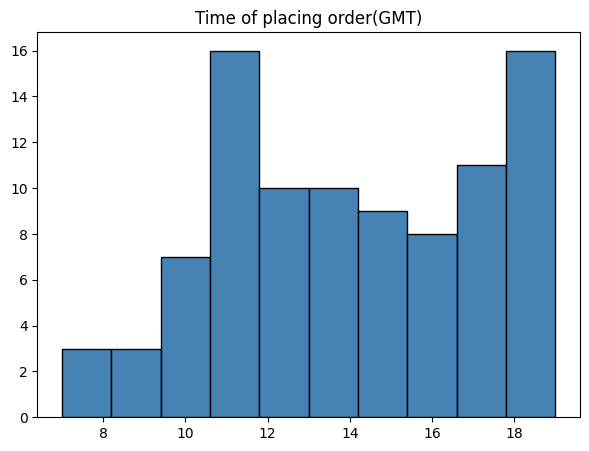

In [ ]:
orderTime = []
for i in range(len(data)):
  datetime_str = data[i]["order_time"]
  datetime_obj = datetime.strptime(datetime_str,"%Y-%m-%d %H:%M:%S")
  time = datetime_obj.time()
  hour = time.hour
  orderTime.append(hour)


fig, ax = plt.subplots(figsize =(7, 5))
ax.hist(orderTime, bins = 10 ,color='steelblue', edgecolor='black')
plt.title("Time of placing order(GMT)")
# Show plot
plt.show()

## **Amount spent**

Breakdown by GST, delivery,packing etc.

**Total amount spent as on 12/06/2023**

In [ ]:
totalCost = []
total = 0.00
for i in range(len(data)):
  total += float(data[i]["payment_transactions"][0]["amount"])
  totalCost.append(total)
  # print((data[i]["payment_transactions"][0]["amount"]))

total

45518.0

**Avg monthly spending**

In [ ]:
total/12

3793.1666666666665

**GST**

In [ ]:
totalGst = 0.00
for i in range(len(data)):
  totalGst += float(data[i]["order_items"][0]["item_charges"]["GST"])
  # print((data[i]["payment_transactions"][0]["amount"]))

print("Total amount spent in GST: {:.2f}".format(totalGst))
percentGst = (totalGst/total)*100
print("% of total amount that was spent in GST: {:.2f}%".format(percentGst))

Total amount spent in GST: 1817.12
% of total amount that was spent in GST: 3.99%


**Items ordered with no GST**

In [ ]:
noGstItems = []
for i in range(len(data)):
  if(data[i]["order_items"][0]["item_charges"]["GST"] == "0"):
    for j in range (len(data[i]['order_items'])):
      noGstItems.append(data[i]["order_items"][j]["name"])

noGstItems

['Cornetto Black Forest 110ml', 'Trixy Blueberry Cheesecake Sundae 110ml']

**Delivery charge**

In [ ]:
delivery = []
totalDelivery = 0.00
for i in range(len(data)):
  totalDelivery += float(data[i]["charges"]["Delivery Charges"])
  delivery.append(totalDelivery)
  # print((data[i]["payment_transactions"][0]["amount"]))

print("Total amount spent in delivery: {:.2f}".format(totalDelivery))
percentDelivery = (totalDelivery/total)*100
print("% of total amount that was spent in delivery: {:.2f}%".format(percentDelivery))

Total amount spent in delivery: 2948.00
% of total amount that was spent in delivery: 6.48%


**Packing charges**

In [ ]:
# count = 0
# for i in range(len(data)):
#   if data[i]["charges"]["Packing Charges"] == "45":
#     count+=1


# data[3]["charges"]["Packing Charges"]
# # data[2]['order_items'][0]["name"]
totalPacking = 0.00
noPackingItems = []
for i in range(len(data)):
  totalPacking += float(data[i]["charges"]["Packing Charges"])
  if(data[i]["charges"]["Packing Charges"] == "0.000000"):
    for j in range (len(data[i]['order_items'])):
      noPackingItems.append(data[i]["order_items"][j]["name"])

percentPacking = (totalPacking/total)*100
print("Total amount spent in packing: {:.2f}".format(totalPacking))
print("% of total amount spent in packing: {:.2f}%".format(percentPacking))
print("Items with no packing charges:", noPackingItems)#CHECK ACCUARACY

Total amount spent in packing: 2062.23
% of total amount spent in packing: 4.53%
Items with no packing charges: ['Box of 9 Assorted cupcakes ( Buy 8 get 1 free)', 'Executive Non Vegetarian Meal 1', 'Bread Pakoda', 'Paneer Pattice', 'Veg Pizza Roll', 'Vada Pav', 'Buy 4 & Get 2 Free All Assorted Donuts', 'Mini Lunch', 'Chapathi With Kurma', 'Mini Lunch', 'Paratha With Kurma', 'Mini Tiffin', 'Mini Tiffin', 'Dahi Papadi Chat', 'Vegetable Club Sandwich', 'Chola Bhatura', 'Idly (2 Pcs)', 'Idly (2 Pcs)', 'Bread Pakoda', 'Paneer Pattice', 'Grilled Chilli Cheese Sandwich', 'Masala Dosai', 'Buy 4 & Get 2 Free All Assorted Donuts']


**Complete visualization of cost breakdown**

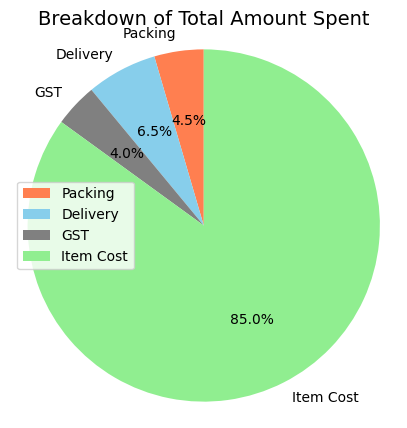

In [ ]:
totalCancellation = 0
cancelled = 0
for i in range(len(data)):
  if float(data[i]["charges"]["Cancellation Fee"]) == 0.0:
    cancelled = 0
  else:
    cancelled = 1
    totalCancellation += float(data[i]["charges"]["Cancellation Fee"])



# Create a list of values for the pie chart
if cancelled == 0:
  # Create a list of labels for the pie chart
  labels = ['Packing', 'Delivery', 'GST', 'Item Cost']
  values = [totalPacking, totalDelivery, totalGst, total - (totalPacking + totalDelivery + totalGst)]
  # Create a list of colors for the pie chart
  colors = ['#FF7F50', '#87CEEB', '#808080', '#90EE90']
else:
  # Create a list of labels for the pie chart
  labels = ['Packing', 'Delivery', 'GST', 'Cancelation Fee', 'Item Cost']
  values = [totalPacking, totalDelivery, totalGst, totalCancellation, total - (totalPacking + totalDelivery + totalGst)]
  # Create a list of colors for the pie chart
  colors = ['#FF7F50', '#87CEEB', '#808080', '#90EE90']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.title("Breakdown of Total Amount Spent", fontsize=14)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.show()

## **Geographical data**

**Area wise order breakdown**

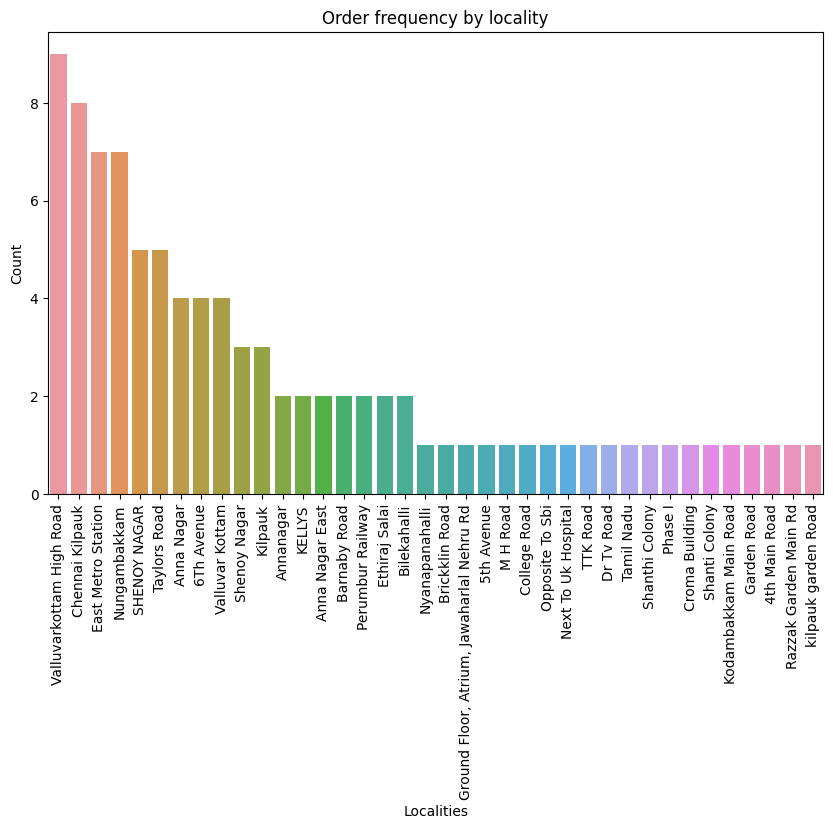

In [ ]:
localities = []
for i in  range (len(data)):
  #extracting localities
  localities.append(data[i]["restaurant_locality"])

# Count the occurrences of each locality
locality_count = {}

for locality in localities:
    if locality in locality_count:
        locality_count[locality] += 1
    else:
        locality_count[locality] = 1

# Create a pandas Series from the list
series = pd.Series(locality_count)
# Sort the series by values in descending order
series = series.sort_values(ascending=False)

# Count the occurrences of each value in the Series
value_counts = locality_count.values()
# Plot the count of each value
plt.figure(figsize=(10, 6))
sns.barplot(x=series.index, y=series.values)
plt.title("Order frequency by locality")
plt.xlabel("Localities")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()
